#### California - USA Houseprices - Dataset 2 - Corrected - Excercise 1 - Timothy Gregorian

In this project, I used the same U.S. housing dataset as before (All_States_USA_ANN_Regression.ipynb) but focused only on the US state California. The goal was to test whether reducing the variable state to one state could improve the overall model performance and increase the R² score compared to using all states.

#### Link to Dataset 2
https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

#### Information about the Dataset
This USA Housing Market Dataset contains around 2.2 million rows and 12 columns of real-estate related data, which can be used for housing price predictions.

#### Data Description
The dataset contains thousands of housing records from different U.S. states and includes multiple variables that can affect property prices. Some of the key variables are:

1) brokered_by: Real estate agency or broker responsible for the listing.

2) status: Current status of the property.

3) price: Selling price of the house -> target variable.

4) bed: Number of bedrooms.

5) bath: Number of bathrooms.

6) acre_lot: Lot size in acres.

7) street: Street address of the property.

8) city: City where the house is located.

9) state: State where the house is located.

10) zip_code: Postal code of the property.

11) house_size: Total living area of the house in square feet.

12) prev_sold_date: Date when the property was previously sold.

#### Imports / Modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [26]:
df = pd.read_csv("realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.00,for_sale,105000.00,3.00,2.00,0.12,1962661.00,Adjuntas,Puerto Rico,601.00,920.00,NaN
1,52707.00,for_sale,80000.00,4.00,2.00,0.08,1902874.00,Adjuntas,Puerto Rico,601.00,1527.00,NaN
2,103379.00,for_sale,67000.00,2.00,1.00,0.15,1404990.00,Juana Diaz,Puerto Rico,795.00,748.00,NaN
3,31239.00,for_sale,145000.00,4.00,2.00,0.10,1947675.00,Ponce,Puerto Rico,731.00,1800.00,NaN
4,34632.00,for_sale,65000.00,6.00,2.00,0.05,331151.00,Mayaguez,Puerto Rico,680.00,NaN,NaN


#### Handle missing values

In [27]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

#### AI was used in this code cell
I used AI fo this code cell, to find the best way to get rid of all missing values in the dataset and because I could not find any code example for handling missing values on the Github:

In [28]:
core_cols = ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot',
             'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']
df = df.dropna(subset=core_cols)

print("Shape after removing missing values:", df.shape)

df = df[df['state'] == "California"]

print("Shape after filtering for California:", df.shape)


Shape after removing missing values: (1084909, 12)
Shape after filtering for California: (157724, 12)


In [29]:
df.isna().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [30]:
int(df.duplicated().sum())

0

In [31]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.00,for_sale,172999.00,3.00,2.00,0.16,987585.00,Blythe,California,92225.00,1132.00,1984-06-29
1209113,4311.00,for_sale,201000.00,2.00,2.00,0.34,761139.00,Blythe,California,92225.00,1100.00,1997-09-23
1209116,76008.00,for_sale,250000.00,7.00,3.00,0.19,1002149.00,Blythe,California,92225.00,3126.00,2015-09-23
1209118,86230.00,for_sale,325000.00,3.00,2.00,5.00,664584.00,Blythe,California,92225.00,1925.00,1985-01-14
1209120,22611.00,for_sale,287500.00,5.00,3.00,0.20,1230938.00,Blythe,California,92225.00,1642.00,2018-03-08


In [32]:
columns_to_delete = ["brokered_by", "status", "street", "city", "state", "zip_code", "prev_sold_date"]
df = df.drop(columns=columns_to_delete)
df.head()

,price,bed,bath,acre_lot,house_size
1208998,172999.00,3.00,2.00,0.16,1132.00
1209113,201000.00,2.00,2.00,0.34,1100.00
1209116,250000.00,7.00,3.00,0.19,3126.00
1209118,325000.00,3.00,2.00,5.00,1925.00
1209120,287500.00,5.00,3.00,0.20,1642.00


#### X/y-Split

In [34]:
X = df.drop("price", axis=1)

y = df["price"]

#### Correlation-Test

In [35]:
correlations = df.corr(numeric_only=True)
correlations

,price,bed,bath,acre_lot,house_size
price,1.00,0.22,0.37,-0.00,0.49
bed,0.22,1.00,0.77,-0.01,0.68
bath,0.37,0.77,1.00,-0.00,0.81
acre_lot,-0.00,-0.01,-0.00,1.00,-0.00
house_size,0.49,0.68,0.81,-0.00,1.00


#### Chi²-Test

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
2,acre_lot,260696026.04
3,house_size,73073898.18
1,bath,60362.01
0,bed,35185.39


#### VIF-Test

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

      feature   VIF
0         bed  9.77
1        bath 15.14
2    acre_lot  1.00
3  house_size  9.76


#### Train-/Test-/Validation-Split

In [38]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [39]:
len(df)

157724

#### Create the neural network structure

In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint('best_model_all_states.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,025 (43.07 KB)

 Trainable params: 11,017 (43.04 KB)

 Non-trainable params: 8 (32.00 B)

#### Train the neural network

In [42]:
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4916367589376.0000 - val_loss: 3432153612288.0000
Epoch 2/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 4856776491008.0000 - val_loss: 3297362837504.0000
Epoch 3/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4796047163392.0000 - val_loss: 3226655260672.0000
Epoch 4/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4756310327296.0000 - val_loss: 6811722711040.0000
Epoch 5/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4751289745408.0000 - val_loss: 3089631543296.0000
Epoch 6/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4698714144768.0000 - val_loss: 3083701583872.0000
Epoch 7/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 4683013816320.0000 - val_loss: 3772429107200.0000
Epoch 8/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 4669683793920.0000 - val_loss: 3316258963456.0000
Epoch 9/30
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 4653644251136.0000 - val_loss: 33979136737

#### Performance and Error Metrics

<Axes: >

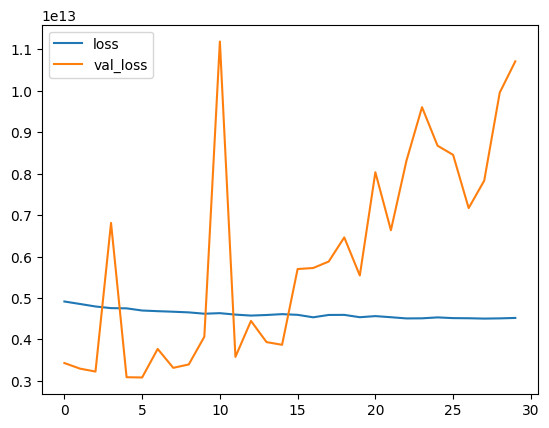

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Load the best model version

In [44]:
from keras.models import load_model
model = load_model("best_model_all_states.keras")

In [45]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
2555277213696.0

Train data evaluation:
4797672456192.0


In [46]:
test_predictions = model.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 804us/step


,Test True Y,Model Predictions
0,700000.00,706870.81
1,1295000.00,654027.12
2,685000.00,1037876.38
3,375000.00,625746.00
4,1199900.00,1087484.00
...,...,...
23654,988888.00,849833.88
23655,825000.00,1250649.38
23656,575000.00,663247.62
23657,1650000.00,760834.00


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

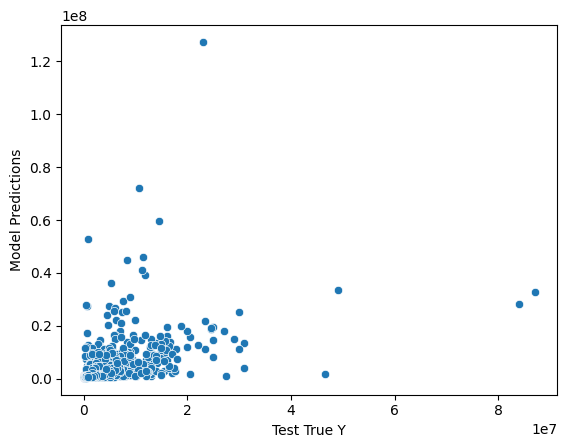

In [47]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [48]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
491140.17 $

MSE
2555277161930.79 $^2

RMSE:
1598523.43 $

R-squared:
0.04

Explained variance score:
0.04


C:\Users\Timothy\AppData\Local\Temp\ipykernel_14652\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))
d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\seaborn\distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in

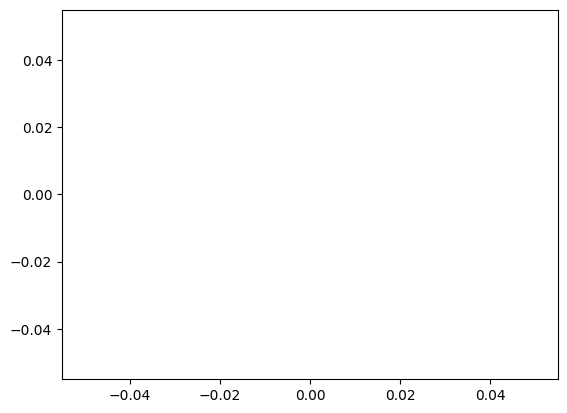

In [54]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [51]:
df.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

#### Trying the model in practice with new imaginery house

In [52]:
tester_row = {
    "bed": 4,
    "bath": 3,
    "acre_lot": 0.14,
    "house_size": 3054.0,
}

tester_row = pd.DataFrame([tester_row])

In [53]:
result = model.predict(tester_row)[0]

print()
print(f"Estimated house price:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Estimated house price:
$ 1224490.38
----------------
